***Diabetes Prediction and Medicine Recommendation***
---
Yes, in the dataset you're working with, **Pregnancies** refers to the number of times a female patient has been pregnant. This feature is particularly relevant in women for determining certain risk factors for diabetes, especially **gestational diabetes** that can occur during pregnancy. milligrams per deciliter

### Normal Ranges for Diabetic and Non-Diabetic Individuals

For other features in the dataset, the normal range for a **non-diabetic** and **diabetic** person varies based on the criteria used to define diabetes. Here are the commonly accepted normal ranges for these features:

1. **Glucose (Blood Sugar Level)**:
   - **Non-Diabetic**: Fasting blood glucose < 100 mg/dL is considered normal.
   - **Prediabetic**: Fasting blood glucose between 100–125 mg/dL.
   - **Diabetic**: Fasting blood glucose ≥ 126 mg/dL.

2. **Blood Pressure (mmHg)**:
   - **Normal Blood Pressure**: Below 120/80 mmHg.
   - **Hypertension** (often linked with diabetes):
     - Stage 1: 130-139/80-89 mmHg.
     - Stage 2: ≥ 140/90 mmHg.
   - **Diabetic patients** often have slightly elevated blood pressure, as hypertension is a risk factor.

3. **Skin Thickness (Triceps skinfold thickness in mm)**:
   - Normal thickness varies, but a skinfold measurement between **10-50 mm** is considered common.
   - **Higher values** can indicate increased fat stores, which may correlate with insulin resistance and diabetes.

4. **Insulin (2-Hour Serum Insulin in µU/mL)**:
   - **Non-Diabetic**: 16–166 µU/mL (this can vary depending on fasting vs. post-meal values).
   - **Diabetic**: Insulin levels might be lower than normal or elevated in Type 2 Diabetes depending on insulin resistance or deficiency.

5. **BMI (Body Mass Index)**:
   - **Underweight**: BMI < 18.5.
   - **Normal**: BMI between 18.5–24.9.
   - **Overweight**: BMI between 25–29.9.
   - **Obese**: BMI ≥ 30. Obesity is strongly linked with Type 2 diabetes.

6. **Diabetes Pedigree Function**:
   - This is a calculated measure indicating the likelihood of diabetes based on family history and genetics.
   - **No clear normal range**, but higher values (> 0.5) indicate a stronger genetic predisposition to diabetes.

7. **Age**:
   - While there's no "normal" age for diabetes, **Type 2 diabetes** is more common in people over 45 years old, although it can occur in younger individuals, especially with risk factors like obesity or family history.
   - **Type 1 diabetes** is more commonly diagnosed in younger individuals (children, teens, young adults).

In general, for diagnosing **diabetes**, fasting glucose levels, HbA1c, and glucose tolerance tests are the most critical indicators, and the values above provide context for determining the likelihood of diabetes based on the features in your dataset.




Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Data Collection and Preprocessing

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Training and Evaluating SVM Model

In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Checking the distribution of outcomes
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

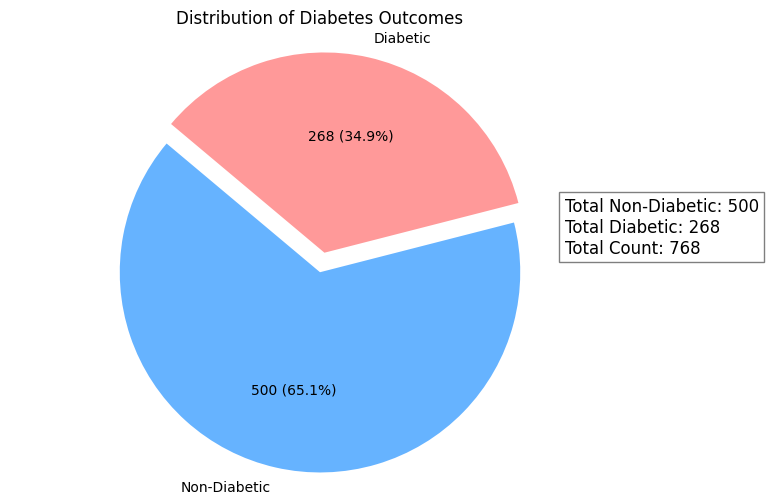

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Non-Diabetic', 'Diabetic']
sizes = [500, 268]
colors = ['#66b3ff', '#ff9999']  # Colors for the pie chart
explode = (0.1, 0)  # explode the 1st slice (Non-Diabetic)

# Function to format the pie chart labels
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))  # Calculate absolute count
    return f'{absolute} ({pct:.1f}%)'  # Return formatted string

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Diabetes Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Adding total values beside the pie chart
total_values = sum(sizes)
plt.text(1.2, 0, f'Total Non-Diabetic: {sizes[0]}\nTotal Diabetic: {sizes[1]}\nTotal Count: {total_values}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [ ]:
# 0 --> Non-Diabetic, 1 --> Diabetic
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# Separating the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [ ]:
X = standardized_data
print(X)
print(Y)

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
(768, 8) (614, 8) (154, 8)


In [ ]:
# Initialize and train the SVM model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Model Evaluation (SVM)
# Accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('SVM Accuracy on training data: ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('SVM Accuracy on test data: ', test_data_accuracy)

SVM Accuracy on training data:  0.7866449511400652
SVM Accuracy on test data:  0.7727272727272727


**Training and Evaluating Random Forest Classifier**

In [ ]:
# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(X_train, Y_train)

# Model Evaluation (Random Forest)
# Accuracy on training data
X_train_rf_prediction = rf_classifier.predict(X_train)
training_data_rf_accuracy = accuracy_score(X_train_rf_prediction, Y_train)
print('Random Forest Accuracy on training data: ', training_data_rf_accuracy)

# Accuracy on test data
X_test_rf_prediction = rf_classifier.predict(X_test)
test_data_rf_accuracy = accuracy_score(X_test_rf_prediction, Y_test)
print('Random Forest Accuracy on test data: ', test_data_rf_accuracy)

Random Forest Accuracy on training data:  1.0
Random Forest Accuracy on test data:  0.7272727272727273


**Training and Evaluating Logistic Regression**

In [ ]:
# Initialize and train the Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, Y_train)

# Model Evaluation (Logistic Regression)
# Accuracy on training data
X_train_lr_prediction = lr_classifier.predict(X_train)
training_data_lr_accuracy = accuracy_score(X_train_lr_prediction, Y_train)
print('Logistic Regression Accuracy on training data: ', training_data_lr_accuracy)

# Accuracy on test data
X_test_lr_prediction = lr_classifier.predict(X_test)
test_data_lr_accuracy = accuracy_score(X_test_lr_prediction, Y_test)
print('Logistic Regression Accuracy on test data: ', test_data_lr_accuracy)

Logistic Regression Accuracy on training data:  0.7850162866449512
Logistic Regression Accuracy on test data:  0.7597402597402597


Training and Evaluating CatBoost Classifier

Comparing Model Results

In [ ]:
print('SVM Test Accuracy:', test_data_accuracy)
print('Random Forest Test Accuracy:', test_data_rf_accuracy)
print('Logistic Regression Test Accuracy:', test_data_lr_accuracy)

SVM Test Accuracy: 0.7727272727272727
Random Forest Test Accuracy: 0.7272727272727273
Logistic Regression Test Accuracy: 0.7597402597402597


**Making a Predictive System**
- This is an example using CatBoost for prediction. You can replace cat_classifier with any model (classifier, rf_classifier, or lr_classifier)
- for example, the input data (1, 85, 66, 29, 0, 26.6, 0.351, 31) represents the following features:

Pregnancies: 1

Glucose: 85

BloodPressure: 66

SkinThickness: 29

Insulin: 0

BMI: 26.6

DiabetesPedigreeFunction: 0.351

Age: 31

**Prediction of Non-diabetic person using Random Forest**

In [ ]:
# Example input for a non-diabetic person
input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)  # Non-diabetic person

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Predict using one of the trained models (e.g., Random Forest)
prediction = rf_classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction of Non-diabetic person using SVM**

In [ ]:
# Example input for a non-diabetic person
input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)  # Non-diabetic person

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Predict using one of the trained models (e.g., SVM)
prediction = classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction of Non-diabetic person using Logistic Regresssion**

In [ ]:
# Example input for a non-diabetic person
input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)  # Non-diabetic person

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Predict using the trained Logistic Regression model
prediction = lr_classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


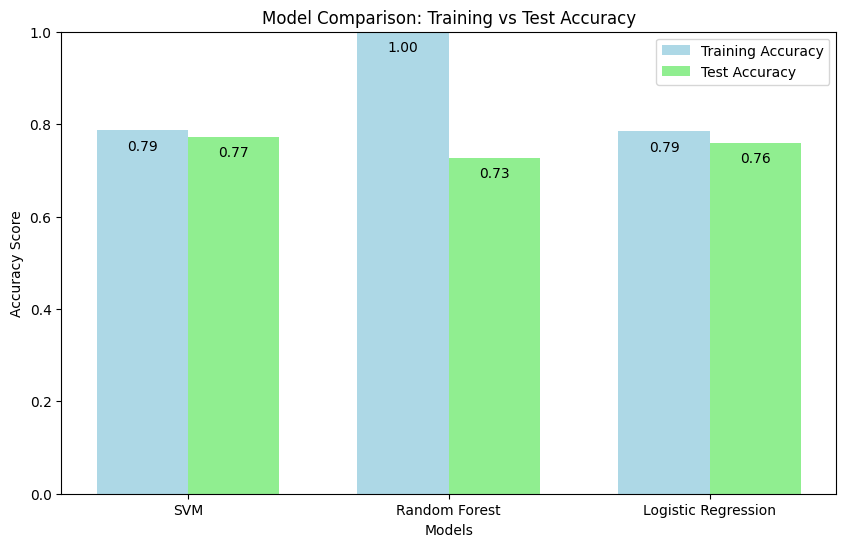

In [ ]:
# Importing Matplotlib for visualization
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for each model on training and test data
model_names = ['SVM', 'Random Forest', 'Logistic Regression']

# Accuracy on training data for all models
training_accuracies = [training_data_accuracy, training_data_rf_accuracy, training_data_lr_accuracy]

# Accuracy on test data for all models
test_accuracies = [test_data_accuracy, test_data_rf_accuracy, test_data_lr_accuracy]

# Number of models (used for positioning bars)
n_models = np.arange(len(model_names))

# Width of bars
bar_width = 0.35

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))

# Creating bars for training accuracy
bars1 = plt.bar(n_models - bar_width/2, training_accuracies, width=bar_width, color='lightblue', label='Training Accuracy')

# Creating bars for test accuracy
bars2 = plt.bar(n_models + bar_width/2, test_accuracies, width=bar_width, color='lightgreen', label='Test Accuracy')

# Adding titles and labels
plt.title('Model Comparison: Training vs Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(n_models, model_names)  # Add model names to x-axis
plt.ylim(0, 1)  # Limiting y-axis to [0,1] as accuracy is a percentage

# Adding data labels on the bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05,
             f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05,
             f'{bar.get_height():.2f}', ha='center', va='bottom')

# Display the legend
plt.legend()

# Display the chart
plt.show()

**Prediction of Diabetic person using SVM**

In [ ]:
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Assuming 'classifier' is your trained model, predict using std_data through SVM
prediction = classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction of Diabetic person using Logistic Regression**

In [ ]:
# Example input for prediction
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Predict using the trained Logistic Regression model
lr_prediction = lr_classifier.predict(std_data)
print(lr_prediction)

if lr_prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction of Diabetic person using Random Forest**

In [ ]:
# Example input for prediction
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Predict using the trained Random Forest model
rf_prediction = rf_classifier.predict(std_data)
print(rf_prediction)

if rf_prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


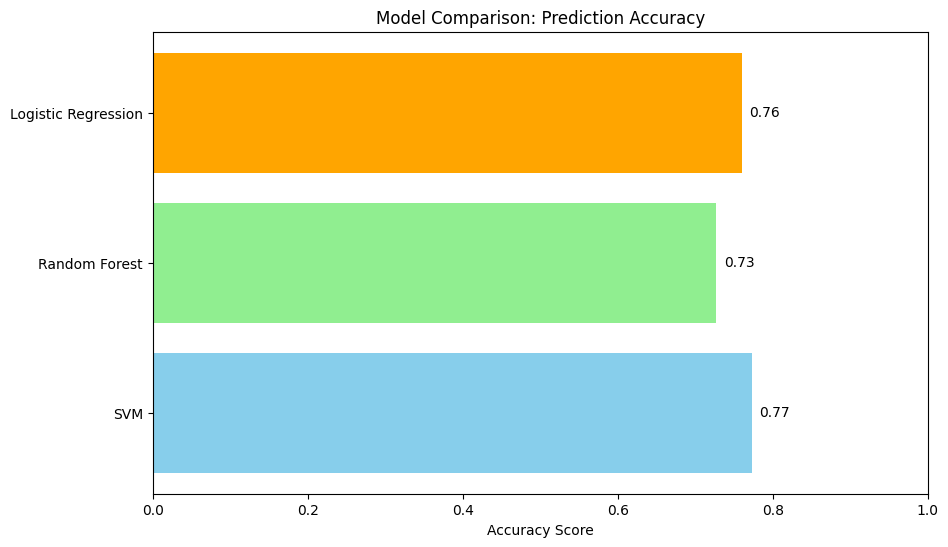

In [ ]:
# Importing Matplotlib for visualization
import matplotlib.pyplot as plt

# Accuracy values obtained from previous model evaluations
model_names = ['SVM', 'Random Forest', 'Logistic Regression',]
accuracies = [test_data_accuracy, test_data_rf_accuracy, test_data_lr_accuracy]

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracies, color=['skyblue', 'lightgreen', 'orange'])

# Adding titles and labels
plt.title('Model Comparison: Prediction Accuracy')
plt.xlabel('Accuracy Score')
plt.xlim(0, 1)  # Limiting x-axis to [0,1] as accuracy is a percentage

# Adding data labels on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left')

# Display the chart
plt.show()
